In [3]:
########################################################################################
# Лабораторная работа 1 по дисциплине МРЗвИС
# Выполнена студентом группы 721702
# БГУИР Гурбович Артём Игоревич
#
# Вариант 9: Реализовать модель линейной рециркуляционной сети.
#
# 11.10.2019

########## IMPORTS #####################################################################################################################

import numpy as np
import math
from PIL import Image
# from skimage.util.shape import view_as_blocks

########## IMAGE TO BLOCKS FUNCTION ####################################################################################################

def image_to_blocks(arr):
    result = []
    for i in range(h // n):
        for j in range(w // m):
            tmp = []
            for y in range(n):
                for x in range(m):
                    for k in range(3):
                        tmp.append(arr[k, i*n+y, j*m+x])
            result.append(tmp)
    return np.array(result)

########## BLOCKS TO IMAGE FUNCTION ####################################################################################################

def blocks_to_image(arr):
    result = np.array([np.arange(h*w, dtype="float64").reshape(h, w),
                       np.arange(h*w, dtype="float64").reshape(h, w),
                       np.arange(h*w, dtype="float64").reshape(h, w)])
    a = -1
    for i in range(h // n):
        for j in range(w // m):
            a += 1
            b = 0
            for y in range(n):
                for x in range(m):
                    for k in range(3):
                        result[k, i*n+y, j*m+x] = arr[a, b+k]
                    b += 3
    return result

########## SHOW IMAGE FROM ARRAY FUNCTION ###############################################################################################

def show_image_from_array(arr):
   img = Image.fromarray(arr).convert('RGB')
   img.save('test333.jpg')

########## RESTORE IMAGE FUNCTION #######################################################################################################

def restore_image(arr):
    arr = 1 * (arr + 1) / 2
    return arr.reshape(h, w, 3)

def normalize_weights(weights):
    wt = weights.transpose()
    for i in range(np.size(weights, 0)):
        sum = 0
        for j in range(np.size(weights, 1)):
            sum += pow(wt[j, i], 2)
        sum = math.sqrt(sum)
        for j in range(np.size(weights, 1)):
            newWeight = weights[i, j] / sum
            weights[i, j] = newWeight

In [7]:
n, m = 10, 10
p = 64

h, w = 1000, 1000
N = n * m * 3
L = int((h * w) / (n * m))
print('N =', N)
print('L =', L)
print('Z =', (N*L)/((N+L)*p+2))
img = Image.open("test4.jpg")
image = np.asarray(img).reshape(3, h, w)
image = (2.0 * image / 255) - 1.0
image_blocks = image_to_blocks(image).reshape(L, 1, N)

In [9]:
w1 = np.random.rand(N, p) * 2 - 1
z = np.copy(w1)
w2 = z.transpose()

error_max = 3000.0
error_current = error_max + 1
alpha = 0.001
epochs = 150

for epoch in range(epochs):
    error_current = 0
    for i in image_blocks:
        y = i @ w1
        x1 = y @ w2
        dx = x1 - i
        print(y.shape, x1.shape, dx.shape)
        w1 -= alpha * np.matmul(np.matmul(i.transpose(), dx), w2.transpose())
        w2 -= alpha * np.matmul(y.transpose(), dx)
    for i in image_blocks:
        dx = ((i @ w1) @ w2) - i
        error = (dx * dx).sum()
        error_current += error
    print('Epoch ', epoch, ' ', 'error ', error_current)
    
    normalize_weights(w1)
    normalize_weights(w2)
    
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


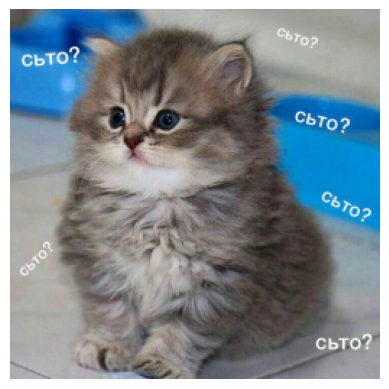

In [112]:
res = []
for i in image_blocks:
    res.append(i.dot(w1).dot(w2))
res = np.array(res)

show_image_from_array(restore_image(blocks_to_image(res.reshape(L, N))))